<a href="https://colab.research.google.com/github/Heimish-cozy/IORS/blob/main/TRY_B_KNN%EC%BD%94%EB%93%9C_%EC%82%AC%EC%9A%A9_Train_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import

In [ ]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 93.7 MB/s 


In [ ]:
import os.path
import rasterio
from rasterio.plot import show

데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import gdown

In [ ]:
fname_img1 = "ground.tiff"
fname_img2 = "ocean1.tiff"
fname_img3 = "developed.tiff"
fname_img4 = "structure1.tiff"
fname_imgA = "low.tiff"

In [ ]:
!gdown --id 1GBf-UPV8Y4nzk_3NazchTSZFRQO1yBBH
!gdown --id 1p556UrSi2SAk67ugP9aNQv873htBpdz-
!gdown --id 1V4dfhtd7_rnwvljGVOimZOXEwkTTyL-9
!gdown --id 1sPIZ8ySyQlb1ITv_l4Ep_pT0Zw3H7bSy
!gdown --id 17zNDapWke5xu_8bYKLRYkUdy9KxQU4sM 

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GBf-UPV8Y4nzk_3NazchTSZFRQO1yBBH
To: /content/ground.tiff
100% 2.70k/2.70k [00:00<00:00, 4.33MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1p556UrSi2SAk67ugP9aNQv873htBpdz-
To: /content/ocean1.tiff
100% 758/758 [00:00<00:00, 984kB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V4d

* 경로체크

In [ ]:
os.path.isfile(fname_img1)
os.path.isfile(fname_img2) 
os.path.isfile(fname_img3) 
os.path.isfile(fname_img4)
os.path.isfile(fname_imgA)

True

In [ ]:
img_g = rasterio.open(fname_img1)
img_o = rasterio.open(fname_img2)
img_d = rasterio.open(fname_img3)
img_s = rasterio.open(fname_img4)
img_A = rasterio.open(fname_imgA)

/usr/local/lib/python3.8/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


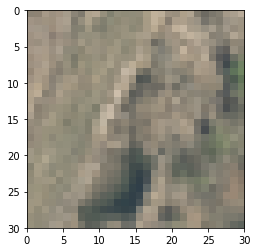

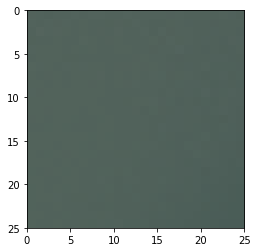

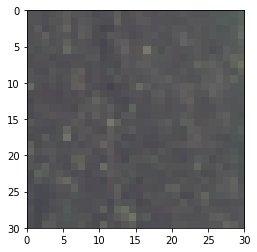

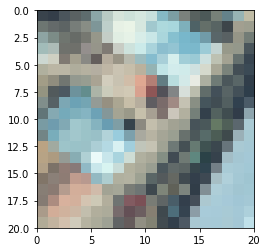

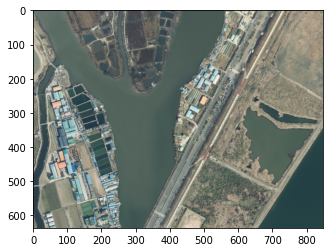

In [ ]:
show(img_g)
show(img_o)
show(img_d)
show(img_s)
show(img_A)

3차원데이터 VECTOR형태 변환

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [ ]:
imframe = Image.open('ground.tiff')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
g_rgb_df = pd.DataFrame(npframe)
g_rgb_df.columns = ['red','green','blue']

In [ ]:
imframe = Image.open('ocean1.tiff')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
o_rgb_df = pd.DataFrame(npframe)
o_rgb_df.columns = ['red','green','blue']

In [ ]:
imframe = Image.open('developed.tiff')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
d_rgb_df = pd.DataFrame(npframe)
d_rgb_df.columns = ['red','green','blue']

In [ ]:
imframe = Image.open('structure1.tiff')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
s_rgb_df = pd.DataFrame(npframe)
s_rgb_df.columns = ['red','green','blue']

In [ ]:
g_rgb_df

,red,green,blue
0,140,131,117
1,142,131,116
2,166,153,136
3,156,144,128
4,162,148,131
...,...,...,...
895,131,125,110
896,135,131,116
897,119,118,107
898,102,105,97


In [ ]:
o_rgb_df

,red,green,blue
0,82,98,91
1,81,98,91
2,80,97,90
3,81,98,91
4,81,98,91
...,...,...,...
620,75,94,88
621,75,93,87
622,74,92,87
623,74,92,87


In [ ]:
d_rgb_df

,red,green,blue
0,83,83,85
1,82,83,85
2,79,78,82
3,82,81,84
4,88,87,88
...,...,...,...
895,88,86,88
896,87,86,87
897,102,102,97
898,95,96,94


In [ ]:
s_rgb_df

,red,green,blue
0,57,67,76
1,52,62,73
2,75,85,92
3,90,97,98
4,94,108,110
...,...,...,...
395,167,201,214
396,166,201,214
397,169,201,211
398,164,199,213


In [ ]:
imframe = Image.open('low.tiff')            #rgb값 df 불러오기
npframe = np.array(imframe.getdata())
A_rgb_df = pd.DataFrame(npframe)
A_rgb_df.columns = ['red','green','blue']

class 그룹/Index 그룹 만들기 

In [ ]:
#group index : ground=1, ocean=2, developed=3, structure=4
train_index = [1]*900 + [2]*625 + [3]*900 + [4]*400

In [ ]:
aa = pd.concat([g_rgb_df,o_rgb_df,d_rgb_df,s_rgb_df],ignore_index=True)

In [ ]:
input_arr = np.array(aa)
target_arr = np.array(train_index)
img_arr = np.array(A_rgb_df)

KNN 코드 실행

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(input_arr,target_arr, test_size=0.2, random_state=100)

In [ ]:
len(X_train)

2542

In [ ]:
len(X_test)

283

In [ ]:
len(Y_train)

2542

In [ ]:
len(Y_test)

283

In [ ]:
knn = KNeighborsClassifier(n_neighbors =3).fit(X_train,Y_train)

In [ ]:
yhat=knn.predict(img_arr)

In [ ]:
from sklearn import metrics
"Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train))

('Train set Accuracy: ', 0.9736428009441385)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
table = confusion_matrix(Y_test, yhat)
report = classification_report(Y_test, yhat)

In [ ]:
print(table)

[[99  0  2  1]
 [ 0 64  0  0]
 [ 3  0 67  0]
 [ 9  0  2 36]]


In [ ]:
print(report)

              precision    recall  f1-score   support

           1       0.89      0.97      0.93       102
           2       1.00      1.00      1.00        64
           3       0.94      0.96      0.95        70
           4       0.97      0.77      0.86        47

    accuracy                           0.94       283
   macro avg       0.95      0.92      0.93       283
weighted avg       0.94      0.94      0.94       283

